# Regressão Logística

## Previsão e Detecção de Risco de Crédito

![title](images/riscos-de-credito.jpeg)

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
df = pd.read_csv('credit_dataset_final.csv')
print(df.shape)
df.head()

(1000, 21)


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
df['credit.purpose'].value_counts()

3    364
4    352
2    181
1    103
Name: credit.purpose, dtype: int64

In [4]:
df.occupation.unique()

array([3, 2, 1, 4])

In [5]:
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [6]:
df.columns[1:]

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [7]:
len(df.columns[1:])

20

In [8]:
len(df)

1000

## Análise Exploratória

In [9]:
# variavél target ou classe - class
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


<AxesSubplot:xlabel='credit.rating', ylabel='credit.amount'>

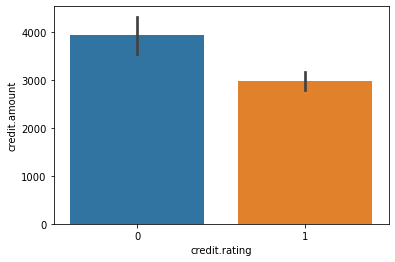

In [11]:
import seaborn as sns
sns.barplot(x='credit.rating',y='credit.amount', data=df)

In [12]:
sns.factorplot(x='credit.rating', y='age', hue='credit.rating', data=df,
                   size=6, kind="bar", palette="muted")

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [13]:
df.age.mean()

35.542

<AxesSubplot:xlabel='age', ylabel='Density'>

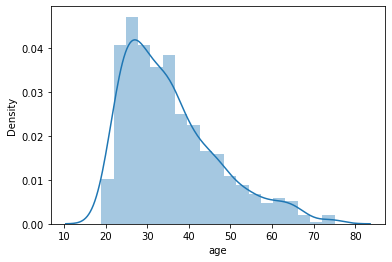

In [14]:
sns.distplot(df.age)

<AxesSubplot:xlabel='credit.amount', ylabel='Density'>

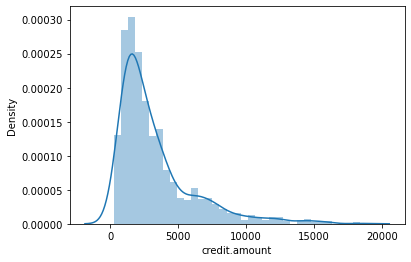

In [15]:
sns.distplot(df['credit.amount']) # quantidade de crédito

In [16]:
df['credit.amount'].mean()

3271.248

## Definindo X e Y

In [17]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [18]:
atributos = df.columns[1:]
atributos

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [19]:
atributos2 = ['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker']

In [20]:
X = df[ atributos2 ]
X.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [21]:
X = X.values.astype(float)
y = df.iloc[:,0]

In [22]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [23]:
X[:3]

array([[   1.,   18.,    3.,    2., 1049.,    1.,    1.,    4.,    1.,
           1.,    4.,    2.,   21.,    2.,    1.,    1.,    3.,    1.,
           1.,    1.],
       [   1.,    9.,    3.,    4., 2799.,    1.,    2.,    2.,    3.,
           1.,    2.,    1.,   36.,    2.,    1.,    2.,    3.,    2.,
           1.,    1.],
       [   2.,   12.,    2.,    4.,  841.,    2.,    3.,    2.,    1.,
           1.,    4.,    1.,   23.,    2.,    1.,    1.,    2.,    1.,
           1.,    1.]])

In [24]:
y[:3]

0    1
1    1
2    1
Name: credit.rating, dtype: int64

## Preparando os dados para aplicar Regressão Logistica<br />

In [25]:
X.shape

(1000, 20)

## Aplicando o Algoritmo

In [26]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y) # Treinamento
model

LogisticRegression()

## Avaliando A Acurácia do Modelo

In [27]:
# check the accuracy on the training set
model.score(X, y) * 100

78.0

### Examinando os Coeficientes

In [28]:
cols = df.columns.values
cols

array(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [29]:
cols_atributos = cols[1:]
cols_atributos

array(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [30]:
len(cols_atributos)

20

In [31]:
model.coef_[0]

array([ 0.8043, -0.0227,  0.502 , -0.4664, -0.0001,  0.2643,  0.165 ,
       -0.312 ,  0.1851,  0.0442, -0.066 , -0.2664,  0.0096,  0.1685,
        0.1332, -0.0801, -0.083 , -0.124 ,  0.1839,  0.0759])

In [32]:
len(model.coef_[0])

20

In [33]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['account.balance', 0.804251676340729],
 ['credit.duration.months', -0.02268936748492723],
 ['previous.credit.payment.status', 0.5020077173991732],
 ['credit.purpose', -0.46638893213319066],
 ['credit.amount', -9.308235107329014e-05],
 ['savings', 0.26434867137404705],
 ['employment.duration', 0.16503790994475115],
 ['installment.rate', -0.3119725327889782],
 ['marital.status', 0.185128177032248],
 ['guarantor', 0.04418547691187842],
 ['residence.duration', -0.0659677646419911],
 ['current.assets', -0.266380216885277],
 ['age', 0.009560196553527288],
 ['other.credits', 0.168506853835881],
 ['apartment.type', 0.13323953045605566],
 ['bank.credits', -0.08014913161583702],
 ['occupation', -0.08297601462970713],
 ['dependents', -0.12404703528065537],
 ['telephone', 0.18390388833377302],
 ['foreign.worker', 0.07592832064378707]]

In [34]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'Coeficiente'])

,Atributo,Coeficiente
0,account.balance,0.804252
1,credit.duration.months,-0.022689
2,previous.credit.payment.status,0.502008
3,credit.purpose,-0.466389
4,credit.amount,-0.000093
5,savings,0.264349
6,employment.duration,0.165038
7,installment.rate,-0.311973
8,marital.status,0.185128
9,guarantor,0.044185


## Avaliando o modelo usando split de dados

In [35]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test))

700 300


In [36]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression()

In [37]:
# predict class labels for the test set
y_predicted = model2.predict(X_test)
print (y_predicted[:5])

[1 0 1 1 0]


In [38]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, y_predicted) * 100)

Acurácia:  72.66666666666667


In [39]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.2766 0.7234]
 [0.5102 0.4898]
 [0.1124 0.8876]
 [0.0886 0.9114]
 [0.5023 0.4977]]


In [40]:
probs[: , 0]

array([0.2766, 0.5102, 0.1124, 0.0886, 0.5023, 0.5866, 0.0654, 0.1384,
       0.0984, 0.0918, 0.0452, 0.0743, 0.7389, 0.1875, 0.3067, 0.2278,
       0.5248, 0.0952, 0.1601, 0.0432, 0.3737, 0.1553, 0.0122, 0.0458,
       0.2138, 0.2688, 0.8455, 0.3918, 0.5183, 0.2369, 0.4842, 0.3244,
       0.6218, 0.4166, 0.1745, 0.2529, 0.4215, 0.112 , 0.6339, 0.1652,
       0.0869, 0.3338, 0.7126, 0.3658, 0.1607, 0.3829, 0.1979, 0.0063,
       0.4079, 0.265 , 0.188 , 0.1594, 0.2746, 0.2127, 0.1093, 0.0999,
       0.0301, 0.0154, 0.2746, 0.2719, 0.2711, 0.563 , 0.1113, 0.0963,
       0.132 , 0.086 , 0.4163, 0.0311, 0.1581, 0.4336, 0.2836, 0.0779,
       0.1212, 0.059 , 0.7365, 0.0434, 0.0834, 0.058 , 0.0576, 0.524 ,
       0.4403, 0.332 , 0.2739, 0.4517, 0.7218, 0.043 , 0.0517, 0.1528,
       0.0181, 0.7061, 0.3279, 0.0789, 0.5908, 0.0366, 0.2251, 0.1831,
       0.045 , 0.4738, 0.2223, 0.1498, 0.0657, 0.4119, 0.0428, 0.4046,
       0.1604, 0.0881, 0.1106, 0.4852, 0.7878, 0.1557, 0.399 , 0.6276,
      

In [41]:
print('Valores Previstos e suas Probalidades das classes')
df3 = pd.DataFrame( {
                    'Classe': y_predicted,
                   'Prob_classe_0': probs[:, 0],
                   'Prob_classe_1': probs[:, 1] 
                   })
df3.head(10)

Valores Previstos e suas Probalidades das classes


,Classe,Prob_classe_0,Prob_classe_1
0,1,0.276582,0.723418
1,0,0.510165,0.489835
2,1,0.112374,0.887626
3,1,0.088649,0.911351
4,0,0.502251,0.497749
5,0,0.586636,0.413364
6,1,0.065446,0.934554
7,1,0.138402,0.861598
8,1,0.098445,0.901555
9,1,0.091788,0.908212


## Avaliando o modelo usando Cross-validation

In [42]:
from sklearn import model_selection
num_folds = 10
num_instances = len(X)
seed = 7

modelo = LogisticRegression()

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, shuffle=False) #, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, 
                                            scoring='accuracy')

# Print do resultado
print(resultado)
print("Accuracy: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

[0.91 0.92 0.87 0.86 0.86 0.84 0.69 0.6  0.27 0.31]
Accuracy: 0.713 (0.232)


## Realizando Previsões

In [43]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [44]:
df.loc[0,:].values

array([   1,    1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])

In [45]:
df['account.balance'].value_counts()

3    457
1    274
2    269
Name: account.balance, dtype: int64

In [46]:
df.savings.value_counts()

1    603
4    183
3    111
2    103
Name: savings, dtype: int64

In [47]:
df.columns[1:]

Index(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

In [63]:
Xprev1 = np.array(
    [      1,   4,    3,    2, 2049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1] )

Xprev1

array([   1,    4,    3,    2, 2049,    1,    1,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [64]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   1,    4,    3,    2, 2049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [65]:
model.predict(Xprev1)[0]

1

In [66]:
model.predict_proba(Xprev1)[0]

array([0.4657, 0.5343])

In [67]:
df.loc[100,:].values

array([   1,    3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])

In [82]:
Xprev2 = np.array([ 3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

array([   3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,    4,
          1,   40,    2,    2,    1,    3,    1,    2,    1])

In [83]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

array([[   3,   18,    1,    2, 3777,    3,    2,    4,    3,    1,    4,
           1,   40,    2,    2,    1,    3,    1,    2,    1]])

In [84]:
model.predict(Xprev2)[0]

1

In [85]:
model.predict_proba(Xprev2)

array([[0.1098, 0.8902]])

In [86]:
df.loc[5,:].values

array([   1,    1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])

In [87]:
Xprev = np.array([1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

array([   1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,    3,
          1,   48,    2,    1,    2,    2,    2,    1,    2])

In [88]:
Xprev = Xprev.reshape(1, -1)
Xprev

array([[   1,   10,    1,    4, 2241,    1,    1,    1,    3,    1,    3,
           1,   48,    2,    1,    2,    2,    2,    1,    2]])

In [89]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev)[0]

0

In [90]:
model.predict_proba(Xprev)

array([[0.5254, 0.4746]])

In [91]:
df.loc[950,:].values

array([   0,    2,   45,    3,    3, 4746,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])

In [92]:
Xprev3 = np.array([2,   14,    3,    3, 12146,    1,    1,    4,    3,    1,
          2,    2,   24,    1,    2,    2,    2,    1,    1,    1])
Xprev3

array([    2,    14,     3,     3, 12146,     1,     1,     4,     3,
           1,     2,     2,    24,     1,     2,     2,     2,     1,
           1,     1])

In [93]:
Xprev3 = Xprev3.reshape(1, -1)
Xprev3

array([[    2,    14,     3,     3, 12146,     1,     1,     4,     3,
            1,     2,     2,    24,     1,     2,     2,     2,     1,
            1,     1]])

In [94]:
# aplicando o modelo de Regressão Logística
model.predict(Xprev3)

array([0])

In [95]:
model.predict_proba(Xprev3)

array([[0.5481, 0.4519]])

# Métricas para Algorítmos de Classificação

### carregando o dataset

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
df = pd.read_csv('credit_dataset_final.csv')
print(len(df))
df.head()

In [96]:
X = df.iloc[:,1:].values.astype(float)
y = Y =  df.iloc[:,0]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) #, True, random_state = seed)

# Criando o modelo

solver = 'newton-cg'
solver = 'lbfgs'
modelo = LogisticRegression(max_iter=200, solver=solver)
# max_iter = iterações realizadas para os otimizadores convergirem.
# Solver = Otimizador

{ 'max_iter': [100, 200, 300, 400],
  'solve': ['newton-cg', 'sag']
}

df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


## Acurácia
Número de previsões corretas. <br />
É útil apenas quando existe o mesmo número de observações em cada classe.

In [97]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.707 (0.231)


## Confusion Matrix
Permite verificar a acurácia de um modelo com duas ou mais classes

Matriz de Confusão


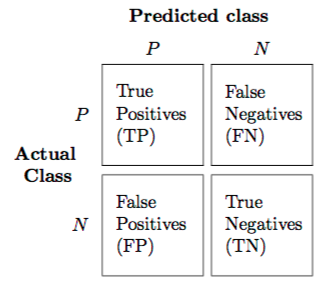

In [98]:
from IPython.display import Image
print("Matriz de Confusão")
Image("confusion_matrix.png")

In [99]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


#matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

[[ 46  59]
 [ 15 210]]


In [100]:
len(X_treino), len(Y_teste)

(670, 330)

In [101]:
Y_teste.shape, Y_treino.shape

((330,), (670,))

## Curva ROC 

![image](images/auc.png)

### Curva ROC 
A Curva ROC permite analisar a métrica AUC (Area Under the Curve).<br />
Essa é uma métrica de performance para classificação binária, em que podemos definir as classes 
em positivas e negativas. <br />
Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity. <br />
Sensitivity é a taxa de verdadeiros positivos (TP). Esse é o número de instâncias positivas da primeira classe 
que foram previstas corretamente. <br />
Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram 
previstas corretamente.<br />
Valores acima de 0.5 indicam uma boa taxa de previsão.

In [102]:
# Definindo os valores para o número de folds
num_folds = 3
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds) 
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print(resultado)
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

[0.8014 0.7527 0.6918]
AUC: 0.749 (0.045)


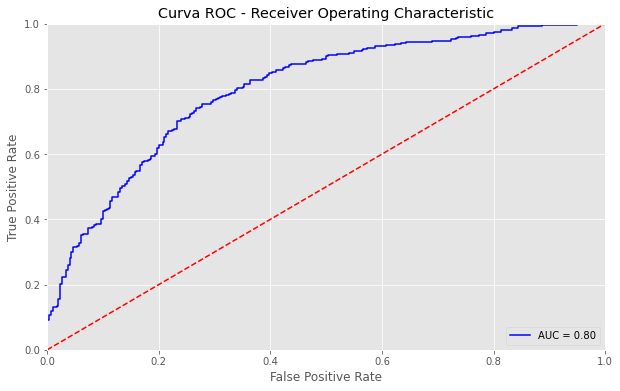

In [103]:
from sklearn import metrics

modelo = LogisticRegression()
modelo.fit(X,y)
# calculate the fpr and tpr for all thresholds of the classification
probs = modelo.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title('Curva ROC - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logarithmic Loss

![image](images/logloss.png)

Onde: <br> 
$ y_i = valor \space observado $ <br>
$ p_i = probabilidade \space prevista $

![image](images/logloss02.png)

![image](images/logloss03.png)

## Logarithmic Loss
Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe.<br />
Valores menores indicam boa performance, com 0 representando um perfeito logloss.<br /> 
A função cross_val_score() inverte o valor.

In [104]:
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

# Print do resultado
print(resultado)
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

[-0.4339 -0.5064 -1.8475]
Logloss: -0.929 (0.650)


## Relatório de Classificação

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas? <br />
$\text{Precision} = \frac{TP}{TP+FP}$
<br /><br />
Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?<br />
$\text{Recall} = \frac{TP}{TP+FN}$
<br /><br />
f1-score: f1-score combina as métricas de precision e recall<br /><br />
$\text{f1-score} = \frac{2 * (precision * recall)}{(precision + recall)}$
<br /><br />
O f1-score pode ser interpretado com a média ponderada entre precision e recall,<br />
onde o f1-score encontra seu melhor valor ao atingir 1, e seu pior valor ao atingir 0<br /><br />
Support: Número de instâncias

## Relatório de Classificação

In [105]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
#Image("confusion_matrix.png", width=250, height=250)

$\text{Precision} = \frac{TP}{TP+FP}$  $ | \text{Recall} = \frac{TP}{TP+FN}$

In [106]:
print(report);print('matriz de confusão:\n', matrix) 

              precision    recall  f1-score   support

           0       0.75      0.44      0.55       105
           1       0.78      0.93      0.85       225

    accuracy                           0.78       330
   macro avg       0.77      0.69      0.70       330
weighted avg       0.77      0.78      0.76       330

matriz de confusão:
 [[ 46  59]
 [ 15 210]]


Recall: Qual a proporção de instâncias positivas, foram identificadas como corretas?

Precision: Qual a proporção de instâncias classificadas como positivas, foram classificadas como corretas?

----

# Selecao de Atributos

In [ ]:
df.head()

In [142]:
y = df['credit.rating'].values
X = df.drop('credit.rating', axis=1).to_numpy()

In [143]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier


num_atributos_relevantes = 17
estimator = modelo = GradientBoostingClassifier()
selector = RFE(estimator, n_features_to_select=num_atributos_relevantes, step=1)
selector = selector.fit(X, y)

print("Num Features: ", selector.n_features_)

atributos = list(df.columns) 
atributos.remove('credit.rating')

print(atributos)
print("Selected Features: ", selector.support_)
print("Feature Ranking: ", selector.ranking_)

Num Features:  17
['account.balance', 'credit.duration.months', 'previous.credit.payment.status', 'credit.purpose', 'credit.amount', 'savings', 'employment.duration', 'installment.rate', 'marital.status', 'guarantor', 'residence.duration', 'current.assets', 'age', 'other.credits', 'apartment.type', 'bank.credits', 'occupation', 'dependents', 'telephone', 'foreign.worker']
Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True False False]
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 4]


In [144]:
dfranking = pd.DataFrame({ 'atributos': atributos, 
                         'ranking' : selector.ranking_, 
                          }) 

dfranking = dfranking.sort_values(by='ranking')
dfranking

,atributos,ranking
0,account.balance,1
17,dependents,1
16,occupation,1
14,apartment.type,1
13,other.credits,1
12,age,1
11,current.assets,1
10,residence.duration,1
9,guarantor,1
7,installment.rate,1


In [145]:
df['account.balance'].unique()

array([1, 2, 3])

In [146]:
atributos_selecionados = dfranking[ (dfranking.ranking == 1) ].atributos
atributos_selecionados = list(atributos_selecionados)
atributos_selecionados

['account.balance',
 'dependents',
 'occupation',
 'apartment.type',
 'other.credits',
 'age',
 'current.assets',
 'residence.duration',
 'guarantor',
 'installment.rate',
 'employment.duration',
 'savings',
 'credit.amount',
 'credit.purpose',
 'previous.credit.payment.status',
 'credit.duration.months',
 'marital.status']

In [147]:
df[atributos_selecionados].head()

,account.balance,dependents,occupation,apartment.type,other.credits,age,current.assets,residence.duration,guarantor,installment.rate,employment.duration,savings,credit.amount,credit.purpose,previous.credit.payment.status,credit.duration.months,marital.status
0,1,1,3,1,2,21,2,4,1,4,1,1,1049,2,3,18,1
1,1,2,3,1,2,36,1,2,1,2,2,1,2799,4,3,9,3
2,2,1,2,1,2,23,1,4,1,2,3,2,841,4,2,12,1
3,1,2,2,1,2,39,1,2,1,3,2,1,2122,4,3,12,3
4,1,1,2,2,1,38,2,4,1,4,2,1,2171,4,3,12,3


In [148]:
y = df['credit.rating'].values
X = df[atributos_selecionados].to_numpy()

In [149]:
resultado = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.600 (0.237)


In [138]:
from sklearn.metrics import confusion_matrix
# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)


#matrix = confusion_matrix(Y_teste, model.predict(X_teste))

# Imprimindo a Confusion Matrix
print(matrix)

[[ 46  59]
 [ 17 208]]


In [ ]:
# Matriz de confusao com os todos os atributos20
# [[ 46  59]
#  [ 15 210]]

In [139]:
df1 = dfranking[ dfranking.ranking == 1 ]
df1

,atributos,ranking
0,account.balance,1
17,dependents,1
16,occupation,1
15,bank.credits,1
14,apartment.type,1
13,other.credits,1
12,age,1
11,current.assets,1
10,residence.duration,1
9,guarantor,1


In [140]:
atributos_ranking = list(df1.atributos.values)
atributos_ranking

['account.balance',
 'dependents',
 'occupation',
 'bank.credits',
 'apartment.type',
 'other.credits',
 'age',
 'current.assets',
 'residence.duration',
 'guarantor',
 'marital.status',
 'installment.rate',
 'employment.duration',
 'savings',
 'credit.amount',
 'credit.purpose',
 'previous.credit.payment.status',
 'credit.duration.months']

In [141]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
